# DATA DESCRIPTION

This dataset includes details of flight prices. Following are the independent and dependent variables present in then Dataset:

Independent Variables-->

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Dependent Variable-->

Price: The price of the ticket

PROBLEM STATEMENT :

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we are be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

So, from the problem statement and the Dataset we can understand that it is a "Regression problem". so we will be using some Regression algorithms to make our model and then use GRIDSEARCHCV for hypeparameter tuning and save the predicted model using pkl.

# Importing the needed Libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# DATA PREPARATION/Loading the Data

In [146]:
#Lpading the training set
df_train = pd.read_excel("Flight_Train.xlsx")


In [147]:
#Loading the test set
df_test = pd.read_excel("Flight_test.xlsx")

# EDA

In [148]:
#Lets see the dimension of both the training and test sets
df_train.shape,df_test.shape

((10683, 11), (2671, 10))

In [149]:
#Lets see the columns of the dataset
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [150]:
#Lets see the columns of the dataset
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

We have 10 independent variables and 1 target variable, i.e. price in the training dataset.

In [151]:
#Loading the head of the Dataset to get a general view of the Data we will be working with.
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [152]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


So by seeing the data we get a general understanding that Data Cleaning is needed in the Dataset before we proceed for our model building phase.

In [153]:
#Loading the head of the Dataset to get a general view of the Data we will be working with.
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [154]:
df_test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [155]:
#Lets check for null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

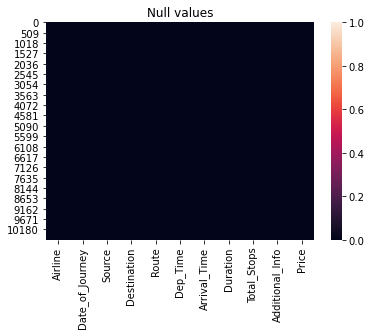

In [156]:
sns.heatmap(df_train.isnull())
plt.title('Null values')
plt.show()

From the heatmap we can see that we have very few null values in the dataset,but from the null count we can see that there are only 2 null values in the Datset.

In [157]:
#Lets check for null values
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

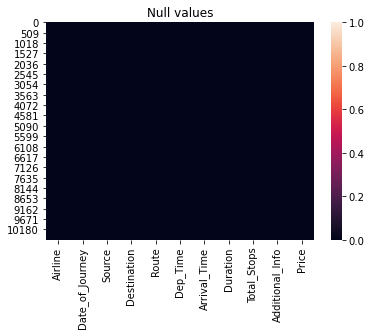

In [158]:
sns.heatmap(df_train.isnull())
plt.title('Null values')
plt.show()

From the heatmap and as well the null count we can see that there are no null values in the test set.

In [159]:
#Dropping Missing Values
df_train.dropna(inplace=True)

In [160]:
#Lets get some general info about the dataset 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


From the above we can see that the dataset has two types i.e int64 and obj. And we can also see that many Dtypes are not what they should be. We would handle these thing in Data cleaning.

In [161]:
#Lets get some general info about the test dataset 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


From the above we can see that the dataset has only 1 type i.e obj. And we can also see that many Dtypes are not what they should be. We would handle these thing in Data cleaning.

# Data Cleaning

In [162]:
# Checking if there are any Duplicate values
df_train[df_train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [163]:
# Drop duplicates value
df_train.drop_duplicates(keep='first',inplace=True)

In [164]:
df_test[df_test.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [165]:
# Drop duplicates value
df_test.drop_duplicates(keep='first',inplace=True)

In [166]:
#Lets analyse the column 'additional_info'
df_train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

So from the above we can see that there are two same columns named 'no info'. Lets make it the same

In [167]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

df_test["Additional_Info"] = df_test["Additional_Info"].replace({'No Info': 'No info'})

In [168]:
# Duration convert hours in min.
df_train['Duration']=  df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration']=  df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In the segment 'Date_of_Journey', we can see the date design is given as dd/mm/yyyy and as you can see the data type is given as an object So there are two different ways to handle this section, either convert the segment into Timestamp or separation the segment into the date, Month, Year. Here, I'm parting the columns

In [169]:
df_train["Journey_day"] = df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train["Journey_month"] = df_train['Date_of_Journey'].str.split('/').str[1].astype(int)

df_test["Journey_day"] = df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test["Journey_month"] = df_train['Date_of_Journey'].str.split('/').str[1].astype(int)

In the column 'Arrival_Time', in the event that we see we have a mix of both time and month yet we need just the time subtleties out of it so we split the time into 'Hours' and 'Minute'.

In [170]:
df_train['Arrival_Time'] = df_train['Arrival_Time'].str.split(' ').str[0]

df_test['Arrival_Time'] = df_test['Arrival_Time'].str.split(' ').str[0]

In [171]:
#Splitting the column into 2 variables(Hour,Minute)

df_train['Arrival_Hour'] = df_train['Arrival_Time'].str.split(':').str[0]
df_train['Arrival_Minute'] = df_train['Arrival_Time'].str.split(':').str[1]

df_train['Arrival_Minute'] = df_train['Arrival_Minute'].astype(int)
df_train['Arrival_Hour'] = df_train['Arrival_Hour'].astype(int)
df_train=df_train.drop(['Arrival_Time'],axis=1)


df_test['Arrival_Hour'] = df_test['Arrival_Time'].str.split(':').str[0]
df_test['Arrival_Minute'] = df_test['Arrival_Time'].str.split(':').str[1]

df_test['Arrival_Minute'] = df_test['Arrival_Minute'].astype(int)
df_test['Arrival_Hour'] = df_test['Arrival_Hour'].astype(int)
df_test=df_test.drop(['Arrival_Time'],axis=1)

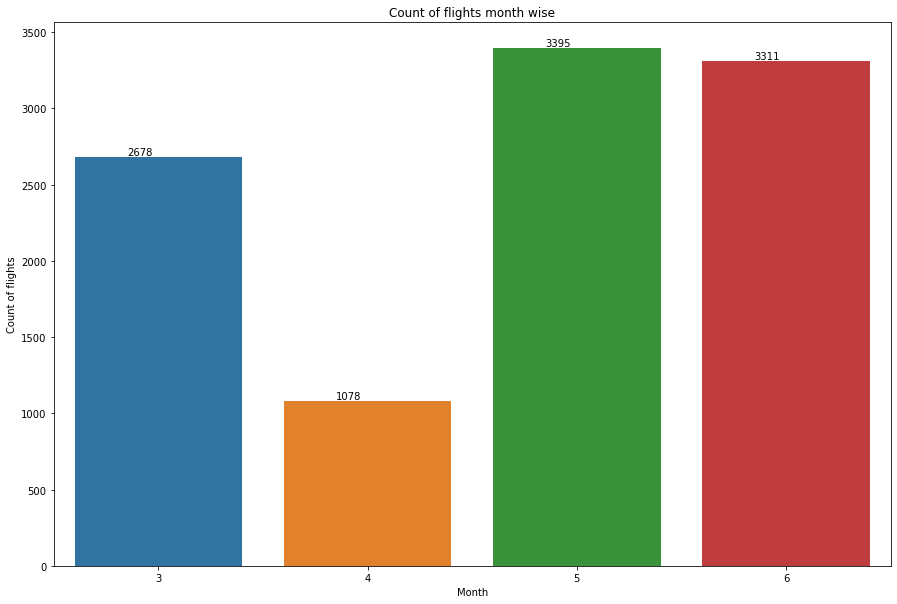

In [173]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

As same as 'Arrival_time' .we split this column additionally in an hour and minute and convert it into an integer

Lets fix the column dep_time

In [174]:
df_train['Dep_Hour'] = df_train['Dep_Time'].str.split(':').str[0]
df_train['Dep_Minute'] = df_train['Dep_Time'].str.split(':').str[1]

df_train['Dep_Hour'] = df_train['Dep_Hour'].astype(int)
df_train['Dep_Minute'] = df_train['Dep_Minute'].astype(int)
df_train=df_train.drop(['Dep_Time'],axis=1)

df_test['Dep_Hour'] = df_test['Dep_Time'].str.split(':').str[0]
df_test['Dep_Minute'] = df_test['Dep_Time'].str.split(':').str[1]

df_test['Dep_Hour'] = df_test['Dep_Hour'].astype(int)
df_test['Dep_Minute'] = df_test['Dep_Minute'].astype(int)
df_test=df_test.drop(['Dep_Time'],axis=1)

In [175]:
#Now lets fix the column total stops

df_train['Total_Stops'] = df_train['Total_Stops'].str[0]
df_train['Total_Stops'] = df_train['Total_Stops'].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')

df_test['Total_Stops'] = df_test['Total_Stops'].str[0]
df_test['Total_Stops'] = df_test['Total_Stops'].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')

In [176]:
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

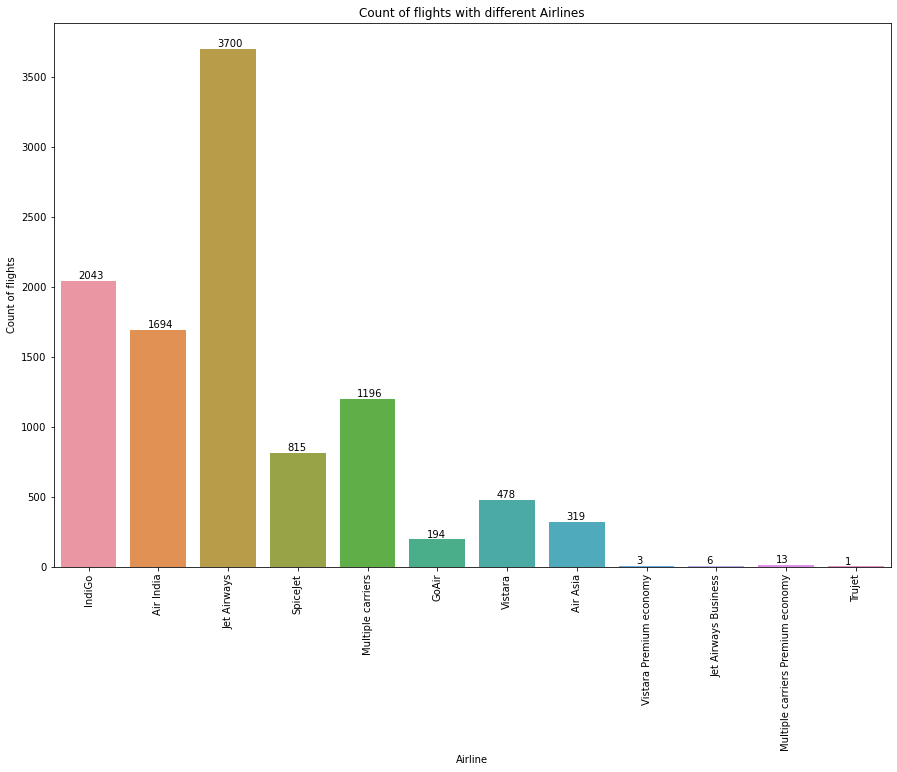

In [177]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

- From the above we can conclude that there are more number of flights of Jet Airways.
- We can also see that Trujet have almost negligible flights.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

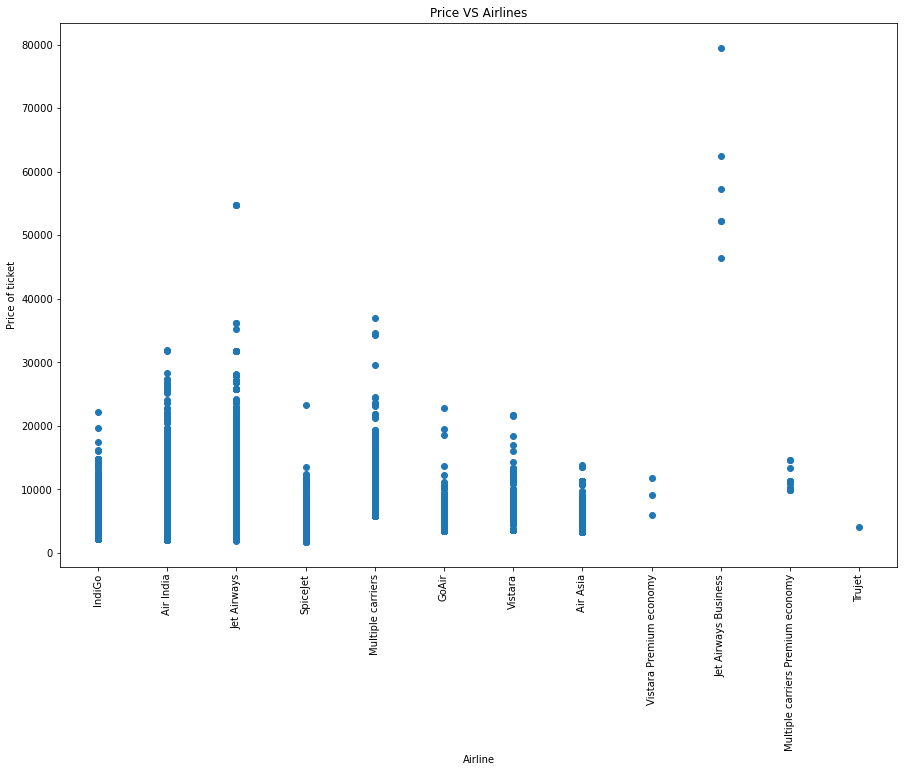

In [178]:
#Lets plot the graph between Price vs Airlines
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df_train['Airline'], df_train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

We can see that ticket rate of Jet Airways is high, that can be justified as it has a premium economy than others.

In [179]:
# Airline
df_train["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

# Airline
df_test["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)



Text(0, 0.5, 'Price of ticket')

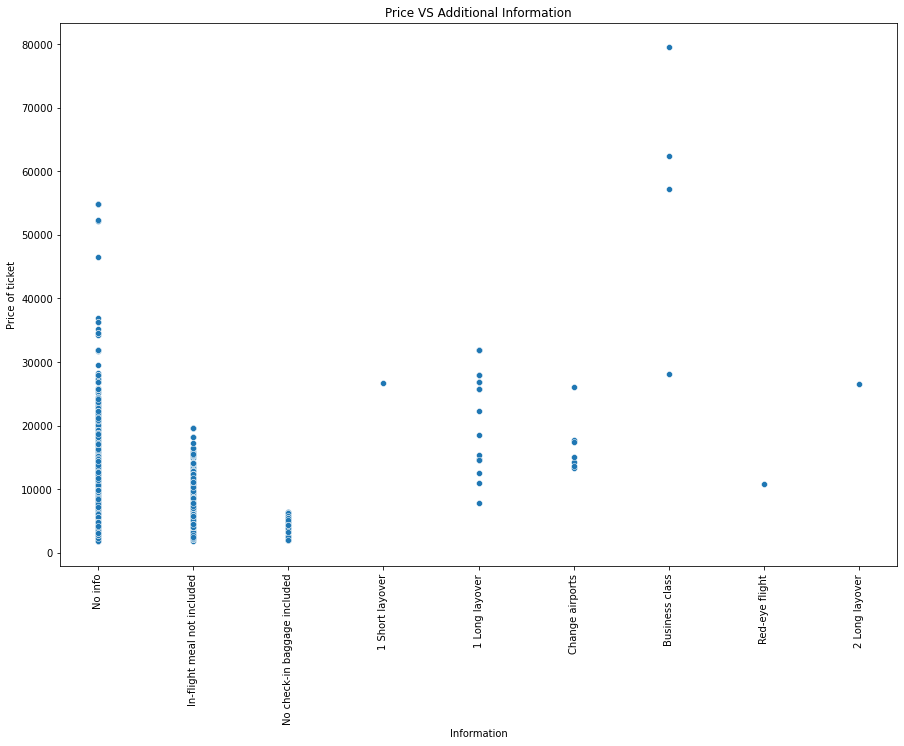

In [180]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(df_train['Additional_Info'], df_train['Price'],data=df_train)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

In [181]:
df_train["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [182]:
# Additional_Info
df_train["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

# Additional_Info
df_test["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [183]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,21,35,16,50


In [184]:
df_train.drop('Date_of_Journey', inplace=True, axis=1)

In [185]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,21,35,16,50


In [186]:
df_test.drop('Date_of_Journey', inplace=True, axis=1)

In [187]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1,No info,24.0,3.0,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1,No info,1.0,5.0,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1,In-flight meal not included,9.0,6.0,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1,No info,12.0,5.0,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,0,No info,1.0,3.0,2,45,23,55


In [188]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  int64 
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Journey_day      10462 non-null  int32 
 9   Journey_month    10462 non-null  int32 
 10  Arrival_Hour     10462 non-null  int32 
 11  Arrival_Minute   10462 non-null  int32 
 12  Dep_Hour         10462 non-null  int32 
 13  Dep_Minute       10462 non-null  int32 
dtypes: int32(6), int64(3), object(5)
memory usage: 1.3+ MB


# Converting categorical data into numerical Data

In [191]:
train_categorical_data = df_train.drop(["Price",'Journey_day','Journey_month','Duration','Total_Stops','Arrival_Hour','Arrival_Minute','Dep_Hour','Dep_Minute'], axis=1)
test_categorical_data = df_test.drop(['Journey_day','Journey_month','Duration','Total_Stops','Arrival_Hour','Arrival_Minute','Dep_Hour','Dep_Minute'], axis=1)

In [192]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [193]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [194]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,3
1,1,3,0,84,3
2,4,2,1,118,3
3,3,3,0,91,3
4,3,0,5,29,3


In [195]:
df_train.drop(['Airline','Source','Destination','Route','Additional_Info'],inplace=True, axis=1)
df_test.drop(['Airline','Source','Destination','Route','Additional_Info'],inplace=True, axis=1)


Concatenate both catagorical and numerical data

In [196]:
X = pd.concat([train_categorical_data, df_train.drop('Price', axis=1)], axis=1)
y= df_train['Price']
test_set = pd.concat([test_categorical_data, df_test], axis=1)

In [197]:
X.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,3,0,5,18,3,170,0,24,3,1,10,22,20
1,1,3,0,84,3,445,2,1,5,13,15,5,50
2,4,2,1,118,3,1140,2,9,6,4,25,9,25
3,3,3,0,91,3,325,1,12,5,23,30,18,5
4,3,0,5,29,3,285,1,1,3,21,35,16,50


In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10462 non-null  int32
 1   Source           10462 non-null  int32
 2   Destination      10462 non-null  int32
 3   Route            10462 non-null  int32
 4   Additional_Info  10462 non-null  int32
 5   Duration         10462 non-null  int64
 6   Total_Stops      10462 non-null  int64
 7   Journey_day      10462 non-null  int32
 8   Journey_month    10462 non-null  int32
 9   Arrival_Hour     10462 non-null  int32
 10  Arrival_Minute   10462 non-null  int32
 11  Dep_Hour         10462 non-null  int32
 12  Dep_Minute       10462 non-null  int32
dtypes: int32(11), int64(2)
memory usage: 1014.7 KB


In [199]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Finding best Random States and importing necessary libraries

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [117]:
X = pd.concat([train_categorical_data, df_train.drop('Price', axis=1)], axis=1)
y= df_train['Price']

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import r2_score

for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=i)
    LR.fit(X_train,y_train)
    pred_train=LR.predict(X_train)
    pred_test= LR.predict(X_test)
    print(f'at random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'at random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

at random state 1, the training accuracy is: 0.4358201158048277
at random state 1, the testing accuracy is: 0.465212103048221


at random state 2, the training accuracy is: 0.46540749519413105
at random state 2, the testing accuracy is: 0.39994795720800236


at random state 3, the training accuracy is: 0.4396054291912458
at random state 3, the testing accuracy is: 0.45578873198932823


at random state 4, the training accuracy is: 0.4440543123409072
at random state 4, the testing accuracy is: 0.44451812294902326


at random state 5, the training accuracy is: 0.43473119870693466
at random state 5, the testing accuracy is: 0.4669573405222419


at random state 6, the training accuracy is: 0.44973042957483755
at random state 6, the testing accuracy is: 0.431097961507382


at random state 7, the training accuracy is: 0.4375680343760122
at random state 7, the testing accuracy is: 0.4584111756113023


at random state 8, the training accuracy is: 0.45076506725986554
at random state 8, the testi

at random state 67, the testing accuracy is: 0.44328798544229


at random state 68, the training accuracy is: 0.46119254926179454
at random state 68, the testing accuracy is: 0.40921855911581373


at random state 69, the training accuracy is: 0.4449181504787413
at random state 69, the testing accuracy is: 0.44193141515183165


at random state 70, the training accuracy is: 0.45092596945998253
at random state 70, the testing accuracy is: 0.42994108925300334


at random state 71, the training accuracy is: 0.43913732955997364
at random state 71, the testing accuracy is: 0.4560993671791891


at random state 72, the training accuracy is: 0.4486653223084893
at random state 72, the testing accuracy is: 0.4331088665172591


at random state 73, the training accuracy is: 0.4497567697330068
at random state 73, the testing accuracy is: 0.43187234307087063


at random state 74, the training accuracy is: 0.4479309630537469
at random state 74, the testing accuracy is: 0.4359224432364285


at random st

In [201]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [202]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 95)

In [203]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
**************************************************
The size of testing input is (3139, 13)
The size of testing output is (3139,)


In [120]:
#RIDGE
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [125]:
#Predict the train result 
y_train_pred =ridge_regressor.predict(X_train)

#Predict test result
y_test_pred =ridge_regressor.predict(X_test)

In [126]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3394.1714151353126
Mean absolute % error:  32
R-squared:  0.4445356792187056


In [127]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3576.454096065187
Mean absolute % error:  32
R-squared:  0.4411934244323854


In [128]:
#LASSO
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [129]:
#Predict train result
y_train_pred =lasso_regressor.predict(X_train) 

#Predict test result
y_test_pred =lasso_regressor.predict(X_test)


In [130]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3406.3647505231097
Mean absolute % error:  32
R-squared:  0.4405375732665837


In [131]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3592.3351649114115
Mean absolute % error:  32
R-squared:  0.4362196997712263


In [132]:
#K Neighbors

k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [133]:
#Predict train result
y_train_pred =knn_regressor.predict(X_train) 

#Predict test result
y_test_pred =knn_regressor.predict(X_test)

In [134]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2385.042301358781
Mean absolute % error:  15
R-squared:  0.7257284271159383


In [135]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  3139.179262630739
Mean absolute % errorr:  19
R-squared:  0.56948485802254


In [136]:
# Decision Tree Regresso

depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [137]:
#Predict train result
y_train_pred =tree.predict(X_train) 

#Predict test result
y_test_pred =tree.predict(X_test)

In [138]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  287.93155096617346
Mean absolute % error:  0
R-squared:  0.9960026963691136


In [139]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2183.4210384231874
Mean absolute % error:  8
R-squared:  0.7917278603411775


In [140]:
# Random Forest Regressor

tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [141]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [142]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  671.3601188207373
Mean absolute % error:  3
R-squared:  0.978267999672005


In [143]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1718.9105357786675
Mean absolute % error:  8
R-squared:  0.870918874207508


In [204]:
# XGB Regressor

tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [205]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [206]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1067.1560862932722
Mean absolute % error:  8
R-squared:  0.9450908758864136


In [207]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1687.3123985876791
Mean absolute % error:  10
R-squared:  0.8756209621405524


# Saving Best Model Using PKl


In [208]:
import joblib
filename = 'flight_price.pkl'
joblib.dump(XGBRegressor(), filename)

['flight_price.pkl']